# Predicting Network Attack Patterns

## Introduction
In an age of information, where data flows as freely as water, safeguarding this vital resource is paramount. Cybersecurity stands as the guardian at the digital gates, crucial to protecting against the ever-evolving threats that lurk in network traffic. This project aims to leverage advancements in AI to interpret the RT_IoT2022 dataset, empowering intrusion detection and protection systems to not just react but proactively anticipate and neutralize threats dynamically to ensure our data streams remain both robust and secure.

### Goal
- [ ] Build a model that has greater than 85% accuracy in predicting network attack types.
- [ ] Identify some attack patterns and indicators.

### The Data

The dataset I am using for this project will be the RT-IoT2022 dataset, as found in the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/942/rt-iot2022). The data is derived from a real-time Internet of Things (IoT) infrastructure. The data collected is representative of both normal network traffic as well as simulated attack scenarios.

There are 123,117 instances within this dataset with 83 different features. There are no missing values.

## Wrangling
This was relatively easy as the UC Irvine ML repository conveniently included sufficient code to import the dataset:
```
pip install ucimlrepo
```
```
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rt_iot2022 = fetch_ucirepo(id=942) 
  
# data (as pandas dataframes) 
X = rt_iot2022.data.features 
y = rt_iot2022.data.targets 
  
# metadata 
print(rt_iot2022.metadata) 
  
# variable information 
print(rt_iot2022.variables) 
```

From there I built a Data Dictionary and assembled a function that imported the data and some relatively minor changes as I deemed necessary.

### Data Dictionary
There are 84 entries in the dictionary containing 83 features and the target variable "Attack_type". The dictionary is complete with the type of information contained in each column, the specific data type as defined by the DataFrame, and a description to explain each entry.""

**NOTE:** Each one of these entries pertains to information and statistics of network packets. As such, they have *not* been renamed in order to preserve their original identities.

| # | Feature | Type | Data Type | Description |
|---|---------|------|-----------|-------------|
| 1 | id.orig_p | Integer | Integer | The network port used by the origin source |
| 2 | id.resp_p | Integer | Integer | The network port used by the responding device |
| 3 | proto | Categorical | Object | The protocol utilized in the connection |
| 4 | service | Continuous | Object | The type of service used in the connection |
| 5 | flow_duration | Continuous | Float | How long the connection lasted between devices |
| 6 | fwd_pkts_tot | Integer | Integer | Total packets forwarded in the session |
| 7 | bwd_pkts_tot | Integer | Integer | Total packets backward (returned) in the session |
| 8 | fwd_data_pkts_tot | Integer | Integer | Total data packets forwarded in the session (excluding control packets) |
| 9 | bwd_data_pkts_tot | Integer | Integer | Total data packets backward in the session (excluding control packets) |
| 10 | fwd_pkts_per_sec | Continuous | Float | Rate of packets forwarded per second |
| 11 | bwd_pkts_per_sec | Continuous | Float | Rate of packets backward per second |
| 12 | flow_pkts_per_sec | Continuous | Float | Combined rate of packets per second |
| 13 | down_up_ratio | Continuous | Float | Ratio of downstream to upstream traffic |
| 14 | fwd_header_size_tot | Integer | Integer | Total size of the header forwarded |
| 15 | fwd_header_size_min | Integer | Integer | Smallest header size sent |
| 16 | fwd_header_size_max | Integer | Integer | Largest header size sent |
| 17 | bwd_header_size_tot | Integer | Integer | Total size of the header returned |
| 18 | bwd_header_size_min | Integer | Integer | Smallest header size returned |
| 19 | bwd_header_size_max | Integer | Integer | Largest header size returned |
| 20 | flow_FIN_flag_count | Integer | Integer | Count of FIN flags signaling the end of data transmission in a session |
| 21 | flow_SYN_flag_count | Integer | Integer | Count of SYN flags used to initiate and establish sessions |
| 22 | flow_RST_flag_count | Integer | Integer | Count of RST flags used to abruptly terminate sessions |
| 23 | fwd_PSH_flag_count | Integer | Integer | Count of PSH flags in forward packets indicating the push of buffered data to the receiving application |
| 24 | bwd_PSH_flag_count | Integer | Integer | Count of PSH flags in backward packets indicating the push of buffered data to the sending application |
| 25 | flow_ACK_flag_count | Integer | Integer | Count of ACK flags used to acknowledge the receipt of packets |
| 26 | fwd_URG_flag_count | Integer | Integer | Count of URG flags in forwarded packets indicating data should be processed urgently |
| 27 | bwd_URG_flag_count | Integer | Integer | Count of URG flags in backward packets indicating data should be processed urgently |
| 28 | flow_CWR_flag_count | Integer | Integer | Count of CWR (Congestion Window Reduced) flags used by the sender to signal congestion control |
| 29 | flow_ECE_flag_count | Integer | Integer | Count of ECE (ECN Echo) flags indicating network congestion without dropping packets |
| 30 | fwd_pkts_payload.min | Continuous | Integer | Minimum payload size in forwarded packets |
| 31 | fwd_pkts_payload.max | Continuous | Integer | Maximum payload size in forwarded packets |
| 32 | fwd_pkts_payload.tot | Continuous | Integer | Total payload size in forwarded packets |
| 33 | fwd_pkts_payload.avg | Continuous | Float | Average payload size in forwarded packets |
| 34 | fwd_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in forwarded packets |
| 35 | bwd_pkts_payload.min | Continuous | Integer | Minimum payload size in backward packets |
| 36 | bwd_pkts_payload.max | Continuous | Integer | Maximum payload size in backward packets |
| 37 | bwd_pkts_payload.tot | Continuous | Integer | Total payload size in backward packets |
| 38 | bwd_pkts_payload.avg | Continuous | Float | Average payload size in backward packets |
| 39 | bwd_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in backward packets |
| 40 | flow_pkts_payload.min | Continuous | Integer | Minimum payload size in the flow |
| 41 | flow_pkts_payload.max | Continuous | Integer | Maximum payload size in the flow |
| 42 | flow_pkts_payload.tot | Continuous | Integer | Total payload size in the flow |
| 43 | flow_pkts_payload.avg | Continuous | Float | Average payload size in the flow |
| 44 | flow_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in the flow |
| 45 | fwd_iat.min | Continuous | Float | Minimum inter-arrival time of forwarded packets |
| 46 | fwd_iat.max | Continuous | Float | Maximum inter-arrival time of forwarded packets |
| 47 | fwd_iat.tot | Continuous | Float | Total inter-arrival time of forwarded packets |
| 48 | fwd_iat.avg | Continuous | Float | Average inter-arrival time of forwarded packets |
| 49 | fwd_iat.std | Continuous | Float | Standard deviation of inter-arrival times of forwarded packets |
| 50 | bwd_iat.min | Continuous | Float | Minimum inter-arrival time of backward packets |
| 51 | bwd_iat.max | Continuous | Float | Maximum inter-arrival time of backward packets |
| 52 | bwd_iat.tot | Continuous | Float | Total inter-arrival time of backward packets |
| 53 | bwd_iat.avg | Continuous | Float | Average inter-arrival time of backward packets |
| 54 | bwd_iat.std | Continuous | Float | Standard deviation of inter-arrival times of backward packets |
| 55 | flow_iat.min | Continuous | Float | Minimum inter-arrival time in the flow |
| 56 | flow_iat.max | Continuous | Float | Maximum inter-arrival time in the flow |
| 57 | flow_iat.tot | Continuous | Float | Total inter-arrival time in the flow |
| 58 | flow_iat.avg | Continuous | Float | Average inter-arrival time in the flow |
| 59 | flow_iat.std | Continuous | Float | Standard deviation of inter-arrival times in the flow |
| 60 | payload_bytes_per_second | Continuous | Float | Rate of payload transmission in bytes per second |
| 61 | fwd_subflow_pkts | Continuous | Float | Forward subflow packet count |
| 62 | bwd_subflow_pkts | Continuous | Float | Backward subflow packet count |
| 63 | fwd_subflow_bytes | Continuous | Float | Forward subflow byte count |
| 64 | bwd_subflow_bytes | Continuous | Float | Backward subflow byte count |
| 65 | fwd_bulk_bytes | Continuous | Float | Forward bulk byte count |
| 66 | bwd_bulk_bytes | Continuous | Float | Backward bulk byte count |
| 67 | fwd_bulk_packets | Continuous | Float | Forward bulk packet count |
| 68 | bwd_bulk_packets | Continuous | Float | Backward bulk packet count |
| 69 | fwd_bulk_rate | Continuous | Float | Rate of bulk data transmission in the forward direction |
| 70 | bwd_bulk_rate | Continuous | Float | Rate of bulk data transmission in the backward direction |
| 71 | active.min | Continuous | Float | Minimum time the flow was active before going idle |
| 72 | active.max | Continuous | Float | Maximum time the flow was active before going idle |
| 73 | active.tot | Continuous | Float | Total time the flow was active before going idle |
| 74 | active.avg | Continuous | Float | Average time the flow was active before going idle |
| 75 | active.std | Continuous | Float | Standard deviation of active times before the flow went idle |
| 76 | idle.min | Continuous | Float | Minimum time the flow was idle |
| 77 | idle.max | Continuous | Float | Maximum time the flow was idle |
| 78 | idle.tot | Continuous | Float | Total time the flow was idle |
| 79 | idle.avg | Continuous | Float | Average time the flow was idle |
| 80 | idle.std | Continuous | Float | Standard deviation of idle times |
| 81 | fwd_init_window_size | Integer | Integer | Initial window size in forwarded TCP connections, indicative of congestion handling |
| 82 | bwd_init_window_size | Integer | Integer | Initial window size in backward TCP connections, indicative of congestion handling |
| 83 | fwd_last_window_size | Integer | Integer | Last window size observed in forwarded TCP connections, can indicate changes in network conditions |
| 84 | Attack_type | Categorical | Object | Specifies the type of network traffic, whether normal or related to specific types of network attacks |


### Imports
There were few changes that I actually made to the dataset, apart from adding a column to identify whether the traffic was an attack pattern or normal pattern.

In [19]:
# Standard library imports
import pandas as pd
import numpy as np

# Import custom functions
import wrangle as w
import explore as e
import model as m

# SciKitLearn modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [20]:
# Import the data into the notebook

# The data is stored in the variable 'tvt_set', which stands for 'train-validate-test_set'
# This variable is a list which contains 3 DataFrames callable by 0,1, and 2 for train, validate, and test, respectively
tvt_set = w.wrangle_iot2022()

# Check the sizes of the DataFrames
print(len(tvt_set))
[print(df.shape) for df in tvt_set]

Reading from file...
3
(86181, 84)
(25855, 84)
(11081, 84)


[None, None, None]

## Exploratory Data Analysis
During the wrangling stage, I developed some questions about the data. These I organized into functions, to include printing out the question with the function.

### Question 1:

Across duration and size of packets, where do the attack patterns tend to lie?


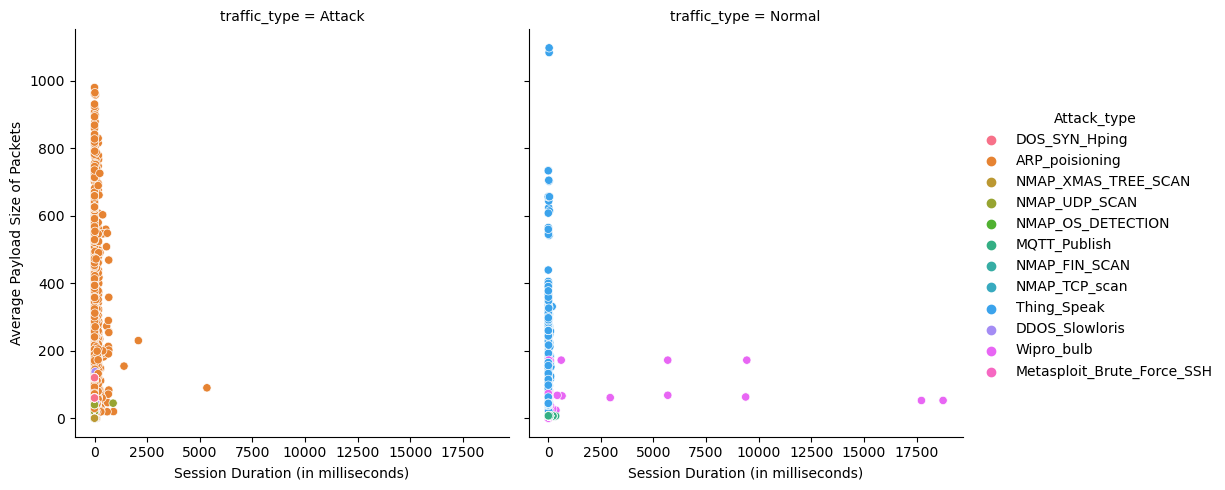

We see here that the attack patterns tend to be very similar to normal traffic, and that there doesn't seem to be much relation between the average size and the duration. However, we can see that the attack durations do tend to be shorter, which makes sense since a threat actor may want to keep his or her patterns less noticeable.

Where do the types of services tend to lie?


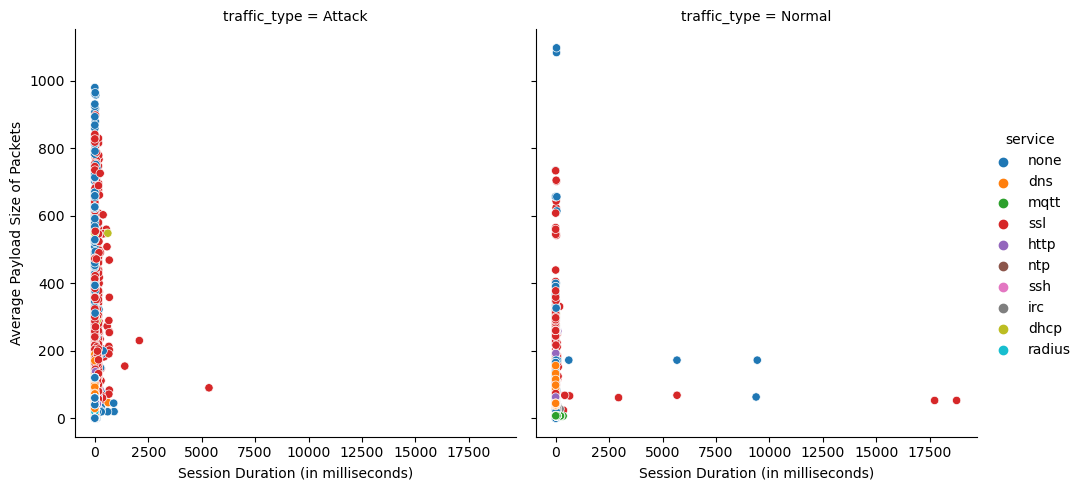

Where do the protocols tend to lie?


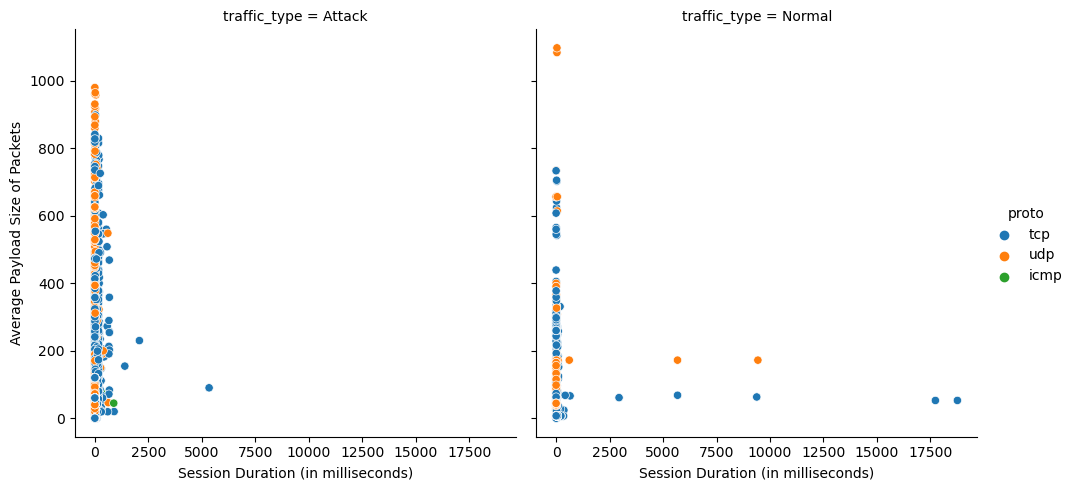

We see that as above, threat actors attempt to keep much of their network traffic as similar as possible to regular network traffic in order to go unnoticed.


In [23]:
e.q1(tvt_set[0])

### Question 2:

Which services are attack patterns usually targeting?


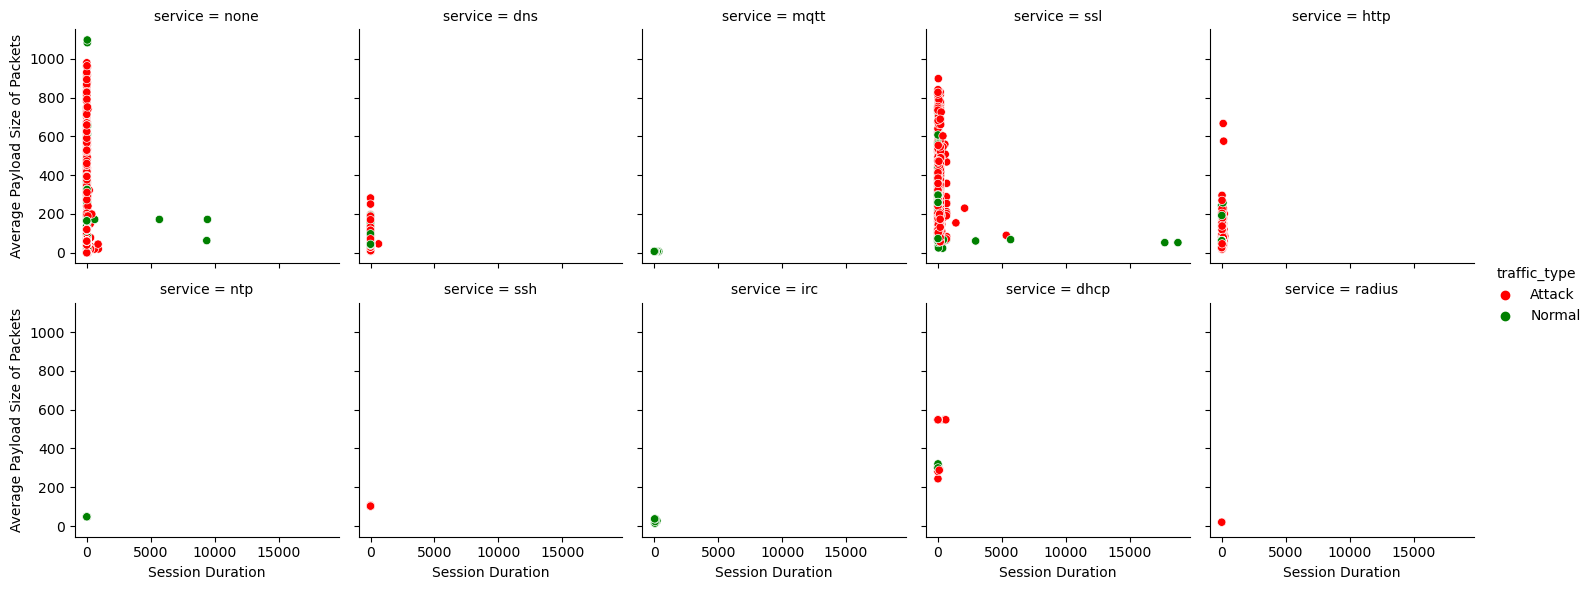

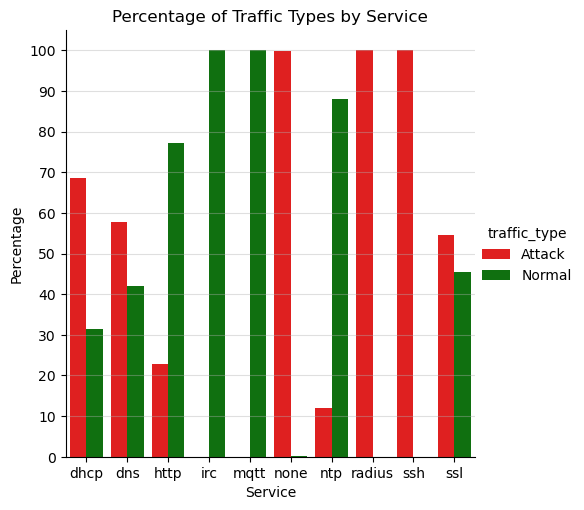

Overall, of the services targeted, they seem to be largely the 'none' type, RADIUS, SSH, and DHCP. Being that RADIUS and SSH are especially used in authentication, this makes sense as a threat actor would prefer to have continued access to the network.


In [25]:
e.q2(tvt_set[0])

### Question 3:

What is the distribution of attacks to normal traffic?


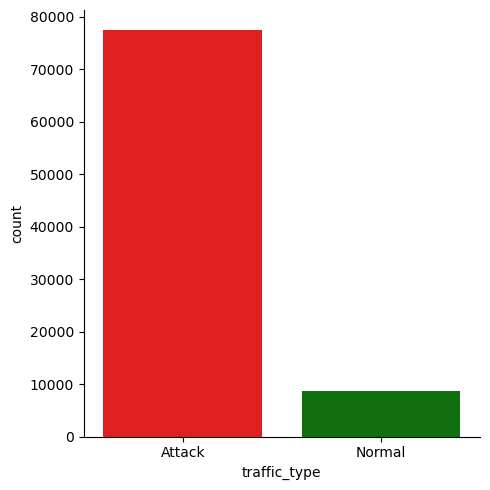

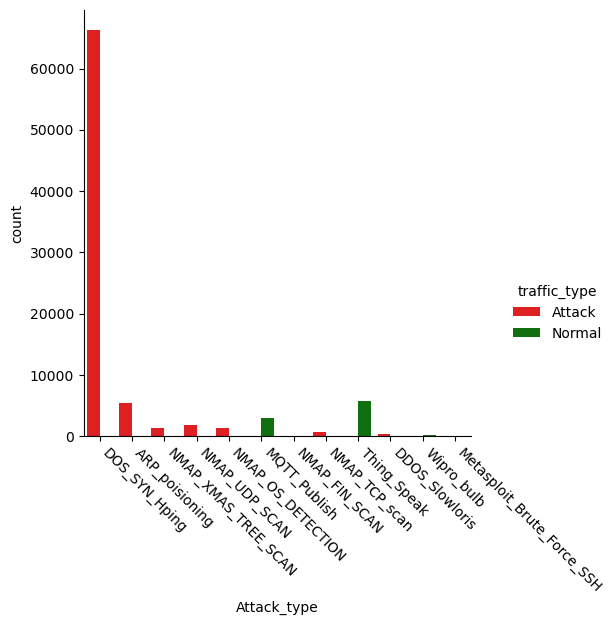

How does this compare with the services and protocols being used?


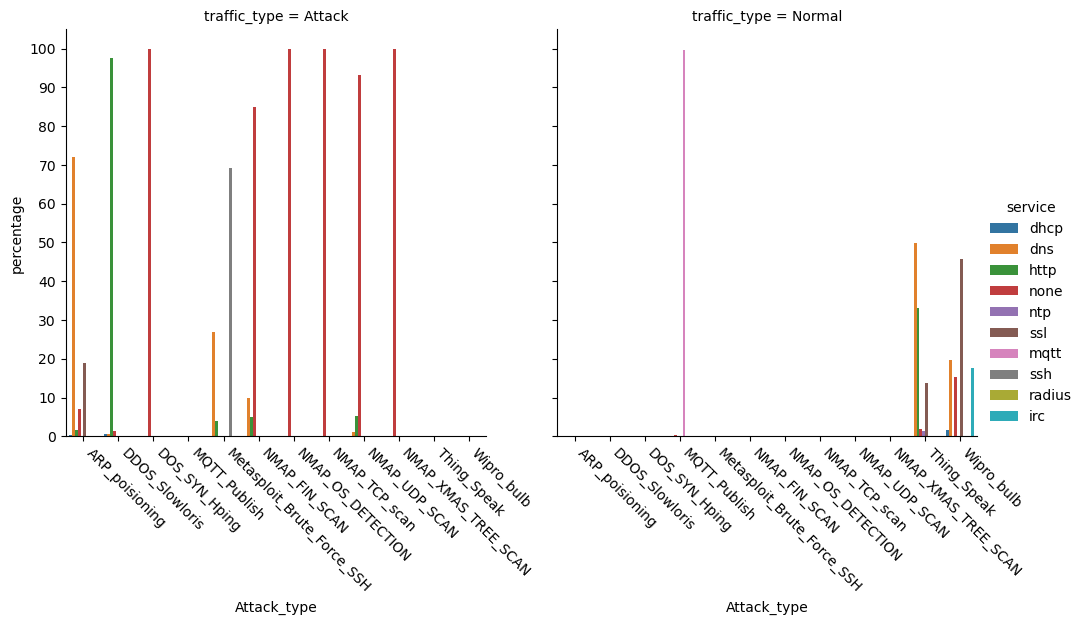

We can see that the primarily targeted service is most of all generic and not at particular services, and the most used is the DOS_SYN_Hping.


In [27]:
e.q3(tvt_set[0])

## Pre-Processing

In [29]:
# Encode the DataFrames while dropping the 'traffic_type' column, which gives away if the type is good or bad
encoded = [m.encode_df(df.drop(['traffic_type'],axis=1),"Attack_type") for df in tvt_set]

[print(df.shape) for df in encoded]

(86181, 94)
(25855, 93)
(11081, 93)


[None, None, None]

In [30]:
# Fix missing columns
encoded[0] = encoded[0].drop(['service_is_radius'],axis=1,)

[print(df.shape) for df in encoded]

(86181, 93)
(25855, 93)
(11081, 93)


[None, None, None]

In [31]:
# Split into X,y for modeling
X_set = [df.drop("Attack_type",axis=1) for df in encoded]
y_set = [df["Attack_type"] for df in encoded]

[print(df.shape) for df in X_set]
[print(df.shape) for df in y_set]

(86181, 92)
(25855, 92)
(11081, 92)
(86181,)
(25855,)
(11081,)


[None, None, None]

## Modeling
For modeling, I wanted to develop a broad range to work with and then narrow those down.

### Test 5 different algorithms
I started with 5 algorithms: Logistic Regression, Decision Tree, Random Forest, Support Vector, and Multi-Layer Perceptron.

I developed some basic search parameters with which to feed into a grid search. The grid search utilizes the Pipeline function to cross validate the models.

In [34]:
results = m.model_testing(X_set[0],y_set[0])

WARNINGS SUPPRESSED.
Assembling pipeline...
Assembling search parameters...
Building the grid search....
Fitting models...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Models fit. Elapsed time: 629.2513360977173 seconds.


Top 3 Algorithm(s): ['RandomForestClassifier', 'DecisionTreeClassifier', 'MLPClassifier']


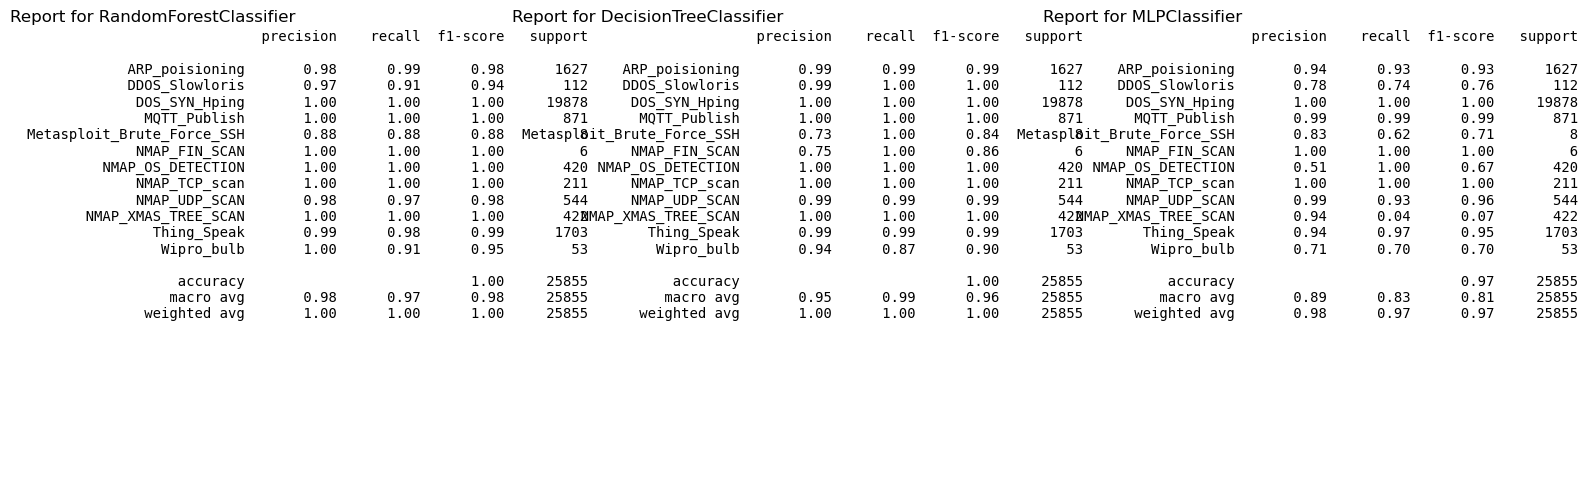

In [36]:
m.print_report(results,X_set,y_set)

### Train the top 2 algorithms
I decided to go with Random Forest and Multi-Layer Perceptron as my final 2 algorithms. I used the same method and applied a much broader search space to account for finer tuning.

In [38]:
finalists = m.final_models(X_set[0],y_set[0])

WARNINGS SUPRESSED.
Building search space...
Building pipeline...
Building grid search...
Fitting models...
Fitting 5 folds for each of 214 candidates, totalling 1070 fits
Models fitted. Elapsed time:4943.119225978851


In [ ]:
m.print_report(finalists,X_set,y_set,n_show=1)

In [49]:
# Isolate the best model
final_model = finalists.sort_values('rank_test_score').iloc[0,4]

In [51]:
# Fit the model and print results
final_model.fit(X_set[0],y_set[0])
print(classification_report(y_set[1],final_model.predict(X_set[1])))

                            precision    recall  f1-score   support

            ARP_poisioning       0.99      0.99      0.99      1627
            DDOS_Slowloris       1.00      0.96      0.98       112
             DOS_SYN_Hping       1.00      1.00      1.00     19878
              MQTT_Publish       1.00      1.00      1.00       871
Metasploit_Brute_Force_SSH       0.89      1.00      0.94         8
             NMAP_FIN_SCAN       0.75      1.00      0.86         6
         NMAP_OS_DETECTION       1.00      1.00      1.00       420
             NMAP_TCP_scan       1.00      1.00      1.00       211
             NMAP_UDP_SCAN       0.99      0.99      0.99       544
       NMAP_XMAS_TREE_SCAN       1.00      1.00      1.00       422
               Thing_Speak       0.99      0.99      0.99      1703
                Wipro_bulb       0.98      0.92      0.95        53

                  accuracy                           1.00     25855
                 macro avg       0.97      0.9

In [52]:
# Show the scores of the model on the test set
print(classification_report(y_set[2],final_model.predict(X_set[2])))

                            precision    recall  f1-score   support

            ARP_poisioning       0.99      0.99      0.99       698
            DDOS_Slowloris       0.98      1.00      0.99        48
             DOS_SYN_Hping       1.00      1.00      1.00      8520
              MQTT_Publish       1.00      1.00      1.00       373
Metasploit_Brute_Force_SSH       0.67      0.67      0.67         3
             NMAP_FIN_SCAN       0.50      0.50      0.50         2
         NMAP_OS_DETECTION       1.00      1.00      1.00       180
             NMAP_TCP_scan       1.00      1.00      1.00        90
             NMAP_UDP_SCAN       1.00      1.00      1.00       233
       NMAP_XMAS_TREE_SCAN       1.00      0.99      1.00       181
               Thing_Speak       0.99      0.99      0.99       730
                Wipro_bulb       0.96      0.96      0.96        23

                  accuracy                           1.00     11081
                 macro avg       0.92      0.9

## Conclusions